# Solutions to problems

Let us first import the relevant packages that will be required for the below coding problems:

In [1]:
from math import pi, cos, sin
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Initial value problems - <span style="color: red;">Coding challenge</span>

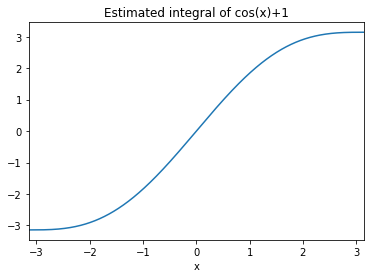

1.6482287601427004e-06


In [2]:
n=1000
h = 2*pi/(n-1)
x = [-pi]
y = [-pi]

for k in range(n-1):
    x.append(x[k] + h)
    y.append(y[k] + h*(cos(x[k]+h/2)+1))

plt.plot(x,y)
plt.xlabel('x')
plt.xlim(-pi,pi)
plt.title('Estimated integral of cos(x)+1')
plt.show()

# Maximum error
y = np.array(y)
x = np.array(x)
print(max(abs(y-[sin(a)+a for a in x])))

## Multi-stage methods - <span style="color: red;">Coding challenge</span>

You can find hidden the various functions described in the previous chapter that are being used to solve the challenge.

In [3]:
# Heun's method
def my_heun(f,t,x0):

    nstep = len(t)
    h = t[1] - t[0]
    x = np.zeros((len(x0),nstep))
    x[:,0] = x0

    for k in range(nstep-1):
        s1 = f(t[k], x[:,k])
        s2 = f(t[k+1], x[:,k]+[h*a for a in s1])
        x[:,k+1] = x[:,k]+[h/2*a for a in np.add(s1,s2)]

    return x

# Euler's implicit method
def my_euli(f,t,X0):

    n = len(t)
    h = t[1]-t[0]
    X = np.zeros((len(X0),n))
    X[:,0] = X0

    for k in range(n-1):
        Z0 = X[:,k]
        X[:,k+1] = fsolve(lambda Z1: Z1-Z0-[h*a for a in f(t[k], Z1)], Z0)

    return X

# Euler's explicit method
def my_eulr(f,x,y0):

    nstep = len(x)
    h = x[1]-x[0]
    y = np.zeros((len(y0),nstep))
    y[:,0]=y0

    for k in range(nstep-1):
        y[:,k+1] = y[:,k]+[h*a for a in f(x[k], y[:,k])]
    return y

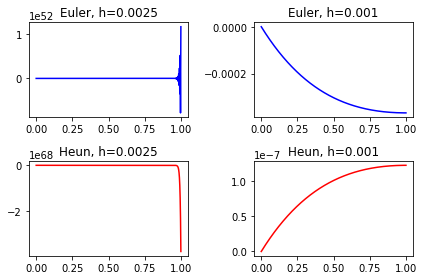

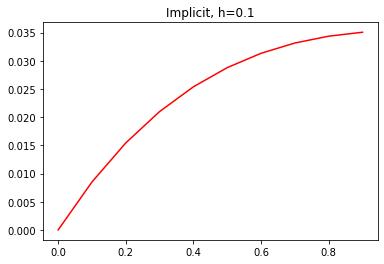

In [4]:
f = lambda t,X: (998*X[0]+1998*X[1],-999*X[0]-1999*X[1])
u0 = 2
v0 = -1
X0 = [u0,v0]

i=0    
fig, ax = plt.subplots(2,2)

for _,h in enumerate([0.0025, 0.001]):
    t = np.arange(0,1,h)
    u = 2*np.exp(-t)

    Xe = my_eulr(f,t,X0)
    Xh = my_heun(f,t,X0)

    ax[0,i].plot(t,Xe[0,:]-u, 'b')
    ax[0,i].set_title('Euler, h=' + str(h))

    ax[1,i].plot(t,Xh[0,:]-u, 'r')
    ax[1,i].set_title('Heun, h=' + str(h))

    i+=1

fig.tight_layout()
plt.show()

# Using implicit Euler
h = 0.1
t = np.arange(0,1,h)
n = len(t)
u = 2*np.exp(-t)
Xi = my_euli(f,t,X0)

plt.plot(t,Xi[0,:]-u,'r')
plt.title('Implicit, h=' + str(h))
plt.show()

## Higher order problems - <span style="color: red;">Coding challenge</span>


### Problem 3: Simple harmonic motion

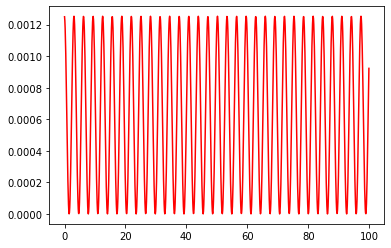

In [5]:
# Set up grids
ht = 0.1
t = np.arange(0,100,ht)
N = len(t)

x = np.zeros((1,N))[0]
x[0] = 1
v = np.zeros((1,N+1))[0]
v[0] = 0

#Leap frog method
for i in range(N-1):
    v[i+1] = v[i]-x[i]*ht
    x[i+1] = x[i]+v[i+1]*ht

v[N] = v[N-1]-x[N-1]*ht
v = (v[:-1]+v[1:])/2

# Compute differenced from extact energy result
plt.plot(t,abs(v**2+x**2-1)/2,'r')
plt.show()